<a href="https://colab.research.google.com/github/mathena828/CIFAR-10_MLP_CNN/blob/main/CIFAR_10_MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint

# Import CIFAR-10 dataset
from keras.datasets import cifar10

<h1>Multilayer Perceptron (MLP)</h1>

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
# Convert label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images to 3072-dimensional vectors and normalize the pixel values
x_train = np.reshape(x_train, (-1, 3072))
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,(-1, 3072))
x_test = x_test.astype('float32') / 255

In [8]:
visible = Input(shape=(3072,))
hidden_1 = Dense(1024, activation='relu')(visible)
hidden_2 = Dense(512, activation='relu')(hidden_1)
hidden_3 = Dense(256, activation='relu')(hidden_2)
output = Dense(10, activation='softmax')(hidden_3)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = Sequential(name='MLP')
# model.add(Dense(2048, input_dim=3072, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(502, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# model.summary()

In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath="checkpoints/mlp", verbose=False, save_best_only = True)
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128, callbacks=[checkpoint])
# Evaluate the model
loss, accuracy = model.evaluate(x_test,
                           y_test, 
                           batch_size=128,
                           verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * accuracy))

Epoch 1/25
390/391 [============================>.] - ETA: 0s - loss: 1.9626 - accuracy: 0.3031WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoints/mlp/assets
391/391 [==============================] - 22s 56ms/step - loss: 1.9622 - accuracy: 0.3032 - val_loss: 1.8500 - val_accuracy: 0.3160
Epoch 2/25
391/391 [==============================] - 21s 54ms/step - loss: 1.7835 - accuracy: 0.3699 - val_loss: 1.7255 - val_accuracy: 0.3973
Epoch 3/25
391/391 [==============================] - 21s 54ms/step - loss: 1.7066 - accuracy: 0.3

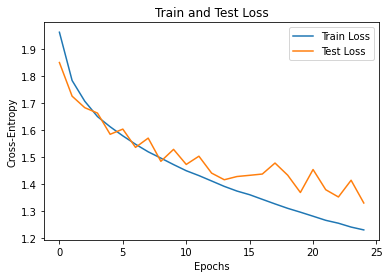

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

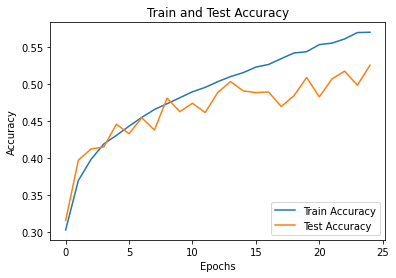

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

<h1>Convolutional Neural Network (CNN)</h1>

In [12]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
# Convert label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Normalize the pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
visible = Input(shape=(32,32,3))
conv_0 = Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu')(visible)
conv_1 = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(conv_0)
pool_1 = MaxPooling2D(pool_size=(2))(conv_1)
conv_2 = Conv2D(64, kernel_size=4, strides=1, padding='same', activation='relu')(pool_1)
pool_2 = MaxPooling2D(pool_size=(2))(conv_2)
conv_3 = Conv2D(128, kernel_size=4, strides=1, padding='same', activation='relu')(pool_2)
pool_3 = MaxPooling2D(pool_size=(2))(conv_3)
pool_3 = Dropout(0.2)(pool_3)
flat = Flatten()(pool_3)
flat = Dropout(0.2)(flat)
hidden_1 = Dense(512, activation='relu')(flat)
hidden_1 = Dropout(0.2)(hidden_1)
output = Dense(10, activation='softmax')(hidden_1)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)        

In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath="checkpoints/cnn", verbose = False, save_best_only = True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128, callbacks=[checkpoint])
# Evaluate the model
loss, accuracy = model.evaluate(x_test,
                           y_test, 
                           batch_size=128,
                           verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * accuracy))

Epoch 1/25
391/391 [==============================] - 237s 607ms/step - loss: 1.0168 - accuracy: 0.6381 - val_loss: 1.0039 - val_accuracy: 0.6456
Epoch 2/25
391/391 [==============================] - 237s 606ms/step - loss: 0.9973 - accuracy: 0.6476 - val_loss: 0.9815 - val_accuracy: 0.6549
Epoch 3/25
391/391 [==============================] - 237s 606ms/step - loss: 0.9752 - accuracy: 0.6548 - val_loss: 0.9635 - val_accuracy: 0.6633
Epoch 4/25
391/391 [==============================] - 236s 605ms/step - loss: 0.9540 - accuracy: 0.6638 - val_loss: 0.9377 - val_accuracy: 0.6699
Epoch 5/25
391/391 [==============================] - 236s 604ms/step - loss: 0.9413 - accuracy: 0.6672 - val_loss: 0.9505 - val_accuracy: 0.6727
Epoch 6/25
391/391 [==============================] - 235s 601ms/step - loss: 0.9211 - accuracy: 0.6762 - val_loss: 0.9795 - val_accuracy: 0.6533
Epoch 7/25
391/391 [==============================] - 237s 605ms/step - loss: 0.9032 - accuracy: 0.6808 - val_loss: 0.9112 -

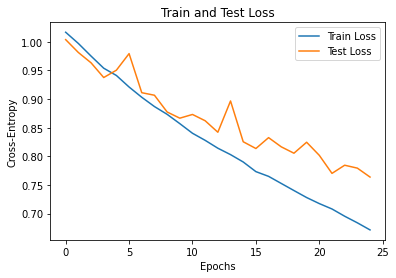

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

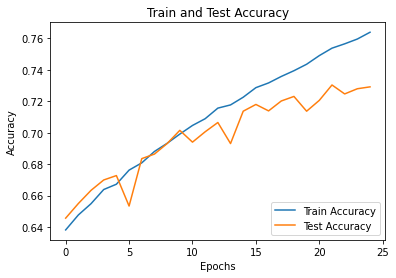

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()